In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from numpy import loadtxt
import pandas as pd
import numpy as np

In [10]:
data=pd.read_csv('titanic.csv')
data#891 rows and 12 feautures(columns)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
data['Sex'].replace({'male':0,'female':1},inplace=True)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C


In [48]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [51]:
df=data.drop(['SibSp','Parch','Ticket','Cabin','Embarked','PassengerId'],axis=1) #dropping colum

In [52]:
df
# Now the dataset contains 891 rows with 5 columns / features

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,NaN,23.4500
889,1,1,1,26.0,30.0000


In [74]:
features=['Pclass','Sex','Age','Fare']
x=df.loc[:,features]
y=df.loc[:,['Survived']]
#splitting the dataset into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(712, 4) (712, 1) (179, 4) (179, 1)


In [75]:
model=Sequential() #plain stack of layers where each layer has exactly one input tensor and one output tensor.
model.add(Dense(32,input_dim=4,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2)) #This will drop 20% inputs during model training
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid')) #As Target variable is 0 and 1 Sigmoid is used


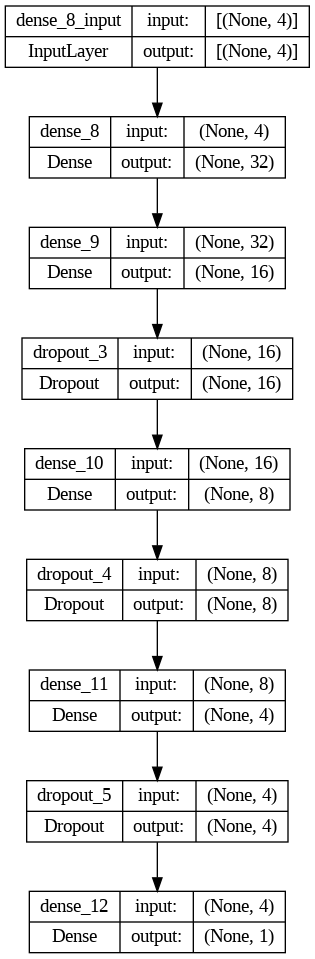

In [76]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [77]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
model.fit(x_train,y_train,epochs=100,batch_size=10,verbose=0)

In [79]:
#EVALUATING THE KERAS MODEL
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print('Model loss: %.2f,Accuracy:%.2f' % ((loss*100),(accuracy*100)))

Model loss: nan,Accuracy:65.36
